In [1]:
import pandas as pd
import numpy as np

In [2]:
cost = pd.read_csv("/Users/angelika/Desktop/Shipt-DataAnalyst-TakeHome/InterviewData_Cost.csv")
rev = pd.read_csv("/Users/angelika/Desktop/Shipt-DataAnalyst-TakeHome/InterviewData_Rev.csv")

### Question1 
Using any functions/packages you want,join these two data sets by “date” and “source_id”,returning all rows from both regardless of whether there is a match between the two data sets.

Let's start with some data exploration

In [3]:
rev.isna().sum()

date          0
source_id     0
revenue      79
dtype: int64

In [4]:
cost.head(5)

,date,source_id,cost
0,10/17/14,PA0577,7168.0
1,8/17/14,PA0354,7615.0
2,1/7/14,PA0607,4054.0
3,8/25/14,PA0745,9317.0
4,11/30/14,PA0923,5586.0


I am going to use outer join in order to preserve value from both datasets regardless of their occurances.

In [5]:
df_join = pd.merge(cost, rev,  how = "outer", left_on = ["source_id","date"], right_on=["source_id","date"])

In [6]:
df_join.head()

,date,source_id,cost,revenue
0,10/17/14,PA0577,7168.0,8417.0
1,8/17/14,PA0354,7615.0,4200.0
2,1/7/14,PA0607,4054.0,7935.0
3,8/25/14,PA0745,9317.0,5536.0
4,11/30/14,PA0923,5586.0,NaN


In [7]:
rev.loc[(rev.source_id=="PA0368") & (rev.date =="8/1/14")]

,date,source_id,revenue
0,8/1/14,PA0368,5717.0


In [8]:
cost.loc[(cost.source_id=="PA0368") & (rev.date =="8/1/14")]

,date,source_id,cost


In [9]:
df_join.loc[(df_join.source_id=="PA0368") & (df_join.date =="8/1/14")]

,date,source_id,cost,revenue
10000,8/1/14,PA0368,NaN,5717.0


As we can see now we have both cost and revenue in one table. NaN value signal that there were no accurace for that specific date and id in one of the data sets. As illustrated with source_id=="PA0368"date =="8/1/14" from example above.

### Data verification for question 1

In [10]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
date         10000 non-null object
source_id    10000 non-null object
revenue      9921 non-null float64
dtypes: float64(1), object(2)
memory usage: 234.5+ KB


In [11]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
date         10000 non-null object
source_id    10000 non-null object
cost         9900 non-null float64
dtypes: float64(1), object(2)
memory usage: 234.5+ KB


As we can see there are 9921 non null records for revenue and 9900 for cost. Let' make sure that all of them were preserved in our merged dataset. 

In [12]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14618 entries, 0 to 14617
Data columns (total 4 columns):
date         14618 non-null object
source_id    14618 non-null object
cost         9900 non-null float64
revenue      9921 non-null float64
dtypes: float64(2), object(2)
memory usage: 571.0+ KB


Great, now we have merged dataset for both revenue and cost with all records preserved even without occurances in both of original datasets.

### Question2
Using any functions/packages you want,join these two datasets by “date” and “source_id”,returning only the rows from the “Cost” file that have no corresponding date in the “Revenue” file.

In [13]:
date_cost_only = df_join.loc[(df_join.revenue.isnull()==True)]

In [14]:
date_cost_only.head()

,date,source_id,cost,revenue
4,11/30/14,PA0923,5586.0,NaN
6,12/17/14,PA0952,6662.0,NaN
7,5/22/14,PA0411,4795.0,NaN
9,10/14/14,PA0168,9651.0,NaN
10,2/13/14,PA0354,2752.0,NaN


### Question3
Using your result from #1,what are the Top 4 sources(“source_id” values)in terms of total revenue generation across this data set? How would you visualize the monthly revenue for those Top 4 sources? (note: you don’t need to actually create a plot; you can just describe what your ideal visual would look like)

In order to answer this question I need to group by values by id and sum up revenue values for each id

In [15]:
top4 = df_join.groupby(["source_id"]).sum().sort_values("revenue", ascending=False).head(4)

In [16]:
top4

,cost,revenue
source_id,,
PA0527,1023620.0,1385747.0
PA0308,894082.0,1338615.0
PA0352,974021.0,1309685.0
PA0552,868176.0,1283190.0


I would visualize it as a histogram, in order to better illustarte revenue levels acroos different ids.

In [17]:
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(*args, **kw)>

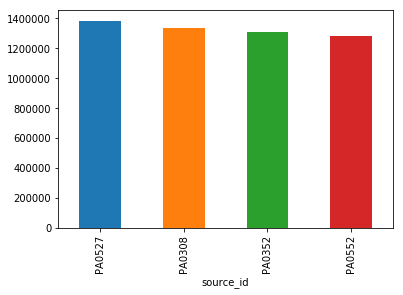

In [18]:
top4.revenue.plot.bar()
plt.show

### Question4
Assuming you’ve read the data in to a Pandas Data Frame called df,run the following code to build a basic logistic regression model:

In [19]:
df = pd.read_csv("/Users/angelika/Desktop/Shipt-DataAnalyst-TakeHome/InterviewData_Activity.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420 entries, 0 to 5419
Data columns (total 7 columns):
userid               5420 non-null object
date                 5420 non-null object
age                  5420 non-null int64
gender               5420 non-null object
metropolitan_area    5420 non-null object
device_type          5420 non-null object
active               5420 non-null int64
dtypes: int64(2), object(5)
memory usage: 296.5+ KB


In [21]:
df.head(5)

,userid,date,age,gender,metropolitan_area,device_type,active
0,4e3a9ea937b3a,8/4/15,30,F,Detroit,Tablet,1
1,4e3dd5154a08c,8/6/15,43,F,Charlotte,Desktop,1
2,4e3df1ecd131a,8/6/15,41,F,Tampa,Mobile,1
3,4e4e77461b1e3,8/19/15,56,F,Nashville,Desktop,1
4,4e4eb59b6de55,8/19/15,33,F,Detroit,Mobile,1


In [22]:
import statsmodels.api as sm

In [23]:
dummy_genders = pd.get_dummies(df['gender'], prefix = 'gender')
dummy_metro = pd.get_dummies(df['metropolitan_area'], prefix = 'metro_area')
dummy_device = pd.get_dummies(df['device_type'], prefix = 'device')
cols_to_keep = ['active', 'age']
activity_data = df[cols_to_keep].join(dummy_genders.ix[:, 'gender_M':])
activity_data = activity_data.join(dummy_metro.ix[:, 'metro_area_Birmingham':])
activity_data = activity_data.join(dummy_device.ix[:, 'device_Mobile':])
activity_data = sm.add_constant(activity_data, prepend=False)
explanatory_cols = activity_data.columns[1:]
full_logit_model = sm.GLM(activity_data['active'], activity_data[explanatory_cols], family=sm.families.Binomial())
result = full_logit_model.fit()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [24]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 active   No. Observations:                 5420
Model:                            GLM   Df Residuals:                     5408
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3613.1
Date:                Thu, 24 Sep 2020   Deviance:                       7226.3
Time:                        13:01:33   Pearson chi2:                 5.38e+03
No. Iterations:                    22   Covariance Type:             nonrobust
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                       0.0136      0.003      5.180      0.000       0.008       0.019
gender_M           

Apply this model to the same data that the model was trained on and assess the prediction accuracy.

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
X = activity_data[explanatory_cols].values  # explanatory values
y = activity_data['active'].values          # target values

In [27]:
clf = LogisticRegression(random_state=20191016).fit(X, y)
print('The accuracy of our model is %0.1f%%' % (clf.score(X, y)*100))

The accuracy of our model is 58.0%


### Question5
Split the data into training and test samples,and build a model over the training data using the following Python code:

In [28]:
training_data = activity_data[1:4000]
test_data = activity_data[4001:].copy()
training_logit_model = sm.GLM(training_data['active'],
training_data[explanatory_cols],
family=sm.families.Binomial())
training_result = training_logit_model.fit()

Assess the training data model’s accuracy on the test data. Why does the accuracy change so much?

In [29]:
X1 = test_data[explanatory_cols].values
y1 = test_data['active'].values

In [30]:
clf = LogisticRegression(random_state=20191016).fit(X1, y1)
print('The accuracy of our model is %0.1f%%' % (clf.score(X1, y1)*100))

The accuracy of our model is 90.9%


In order to answer question about accuracy difference I need to explore and analyze data as well as measure classification performance metrics in details.

In [31]:
training_data = activity_data[1:4000]
test_data = activity_data[4001:].copy()
training_logit_model = sm.GLM(training_data['active'],
training_data[explanatory_cols],
family=sm.families.Binomial())
training_result = training_logit_model.fit()


In [32]:
print(training_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 active   No. Observations:                 3999
Model:                            GLM   Df Residuals:                     3987
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2554.6
Date:                Thu, 24 Sep 2020   Deviance:                       5109.3
Time:                        13:01:33   Pearson chi2:                 3.97e+03
No. Iterations:                    22   Covariance Type:             nonrobust
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                       0.0071      0.003      2.227      0.026       0.001       0.013
gender_M           

In [33]:
activity_data[:4001].active.value_counts()

1    2501
0    1500
Name: active, dtype: int64

In [34]:
activity_data[4001:].active.value_counts()

0    1290
1     129
Name: active, dtype: int64

Seems like our data was heavily unbalanced for the test case. That could be a potential reason. In order to make sure let's explore confusion matrix as well as other measuring classification performance values.

In [35]:
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)
# matrix outputs values in the following order:
# TN FP
# FN TP

array([[2790,    0],
       [2630,    0]])

In [36]:
y_pred1 = clf.predict(X1)
confusion_matrix(y1, y_pred1)

array([[1290,    0],
       [ 129,    0]])

In [37]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.51      1.00      0.68      2790
          1       0.00      0.00      0.00      2630

avg / total       0.26      0.51      0.35      5420



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
print(classification_report(y1, y_pred1))

             precision    recall  f1-score   support

          0       0.91      1.00      0.95      1290
          1       0.00      0.00      0.00       129

avg / total       0.83      0.91      0.87      1419



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Bingo, it seems like the model cannot predict Positives values correctly. Since accuracy is literally a total number of predictions the model gets right. Or, in other words, a ratio of correctly predicted observation to the total observations, failing at predicting True and False Positives will heavily influence the model's accuracy. Moreover, there is a direct correlation between the number of activity == 1 values (Positives) and accuracy value, the larger the number of activity == 1 values in the data the lower the accuracy will be (in this particular case). 
In addition, other classification performance matrices such as precision and recall back up our observations - model does not do a good job at predicting positive values.

### Conclusion

### Question6
This data comes from a subset of user data JSON blobs stored in our database.Parse out the values (stored in the “data_to_parse” column) into four separate columns. So for example, the four additional columns for the first entry would have values of “N”, “U”, “A7”, and “W”. You can use any functions/packages you want for this.

In [39]:
parsing = pd.read_csv("/Users/angelika/Desktop/Shipt-DataAnalyst-TakeHome/InterviewData_Parsing.csv")

In [40]:
parsing.head(5)

,userid,data_to_parse
0,54f3ad9a29ada,"""value"":""N;U;A7;W""}]"
1,54f69f2de6aec,"""value"":""N;U;I6;W""}]"
2,54f650f004474,"""value"":""Y;U;A7;W""}]"
3,54f52e8872227,"""value"":""N;U;I1;W""}]"
4,54f64d3075b72,"""value"":""Y;U;A7;W""}]"


First I will parse data into two parts: "value": and string after that. Since I am interested only in the second part I will not save the first one. 

In [41]:
parsing['temp'] = parsing['data_to_parse'].str.split(":").str[1]

Next I will split data again into 4 different parts, using ; separator in order to distinguish split spaces.

In [42]:
parsing['A'] = parsing['temp'].str.split(";").str[0]
parsing['A'] = parsing['A'].str.split('"').str[1]
parsing['B'] = parsing['temp'].str.split(";").str[1]
parsing['C'] = parsing['temp'].str.split(";").str[2]
parsing['Z'] = parsing['temp'].str.split(";").str[3]
parsing['Z'] = parsing['Z'].str.split('"').str[0]
parsing = parsing.drop(columns = ["temp"])

I also created new columns for every split part and saved them to the dataframe. 

In [43]:
parsing.head()

,userid,data_to_parse,A,B,C,Z
0,54f3ad9a29ada,"""value"":""N;U;A7;W""}]",N,U,A7,W
1,54f69f2de6aec,"""value"":""N;U;I6;W""}]",N,U,I6,W
2,54f650f004474,"""value"":""Y;U;A7;W""}]",Y,U,A7,W
3,54f52e8872227,"""value"":""N;U;I1;W""}]",N,U,I1,W
4,54f64d3075b72,"""value"":""Y;U;A7;W""}]",Y,U,A7,W


Great, task is completed, data is parsed and saved to seprate columns as we wanted to.

### Addition Question
One of the ways we attract new members is through digital marketing campaigns (e.g., on Facebook). Assume that we know a little bit about potential users who see an ad for Shipt on Facebook – things like name and general metropolitan area, and then can measure the impressions on the ad, clicks to our landing page, and then conversions on our landing page. Our goal then is to drive more conversions on the landing page. What are some ways you might look at the already collected data (or some ways to enrich the existing data set) to try and make recommendations to the Marketing team for how to optimize their campaigns?

First of all, we would need to identify relationships between information that we have and conversions on our landing page. This way we will be able to target and identify what areas are working out well and what are not. For example, is people in certain metropolitan area are bringing more conversions than in others? (We could push advertisement more in some specific areas). Do people who have positive impressions of the ad bring more conversions or not? (If no, then maybe advertisement does not clearly illustrate website purpose or vice versa). In addition, we can analyze landing page by itself. What are the places people are clicking on the page the most? What is scrolling activity of the page? (If many people scroll down some part we might need to improve it). How much time people spend on the page and how it influences conversion? What is the content of the page. Or more specifically, is the page content too complicated or on the contrary does not provide enough information? Finally, how clicks influence conversions? (maybe there are too many clicks and low conversions? This might indicate the people are getting confused or tired while deep diving into page’s content). On top of that, we know that the ad comes from Facebook. Therefore, we could potentially extract some additional information on users such as age, gender, occupation and on devices the website was accessed from (from latest we can identify whether or not website performance and visuals depend on the device and if yes then how). While we can perform some machine learning models with current data (Random Forest, Decision Tree, SVM, Logistic Regression etc.), larger amount of data and its diversity would allow us to improve them and apply new algorithms. This will allow us to deep dive into factors that can potentially increase / decrease members activity on the landing page. 
In colclusion there are several specific areas we could target in order to understand their influence on the convergence of the landing page:
* metropolitan area
* impression of the add
* landing page components
* landing page content
* clicks
* potential features we could bring in
* perform machine learning models
